## Replicating "Towards Enhanced Creativity in Interface Design through Automated Usability Evaluation"

### RICO dataset

In [19]:
import json
import numpy
import pandas as pd

In [20]:
vectors = numpy.load("rico_dataset_v0.1_semantic_annotations/ui_layout_vectors/ui_vectors.npy")
names = open("rico_dataset_v0.1_semantic_annotations/ui_layout_vectors/ui_names.json")
names = json.load(names)['ui_names']

In [22]:
datamap = dict()
pathi = "rico_dataset_v0.1_semantic_annotations/semantic_annotations/"
limit = 2000
for i in range (72218):
    try:
        with open(pathi + str(i) + ".json") as f:
            data = json.load(f)
            datamap[i] = data
            limit -= 1
            if limit == 0: break
    except:
        pass

datamap 

{0: {'ancestors': ['android.widget.FrameLayout',
   'android.view.ViewGroup',
   'android.view.View',
   'java.lang.Object'],
  'class': 'com.android.internal.policy.PhoneWindow$DecorView',
  'bounds': [0, 0, 1440, 2560],
  'clickable': False,
  'children': [{'ancestors': ['android.webkit.WebView',
     'android.widget.AbsoluteLayout',
     'android.view.ViewGroup',
     'android.view.View',
     'java.lang.Object'],
    'bounds': [0, 0, 1440, 2392],
    'clickable': True,
    'class': 'org.apache.cordova.engine.SystemWebView',
    'componentLabel': 'Web View'}]},
 1: {'ancestors': ['android.widget.FrameLayout',
   'android.view.ViewGroup',
   'android.view.View',
   'java.lang.Object'],
  'class': 'com.android.internal.policy.PhoneWindow$DecorView',
  'bounds': [0, 0, 1440, 2560],
  'clickable': False,
  'children': [{'ancestors': ['android.webkit.WebView',
     'android.widget.AbsoluteLayout',
     'android.view.ViewGroup',
     'android.view.View',
     'java.lang.Object'],
    'bou

In [23]:
print(json.dumps(datamap[2], indent=2))

{
  "ancestors": [
    "android.widget.FrameLayout",
    "android.view.ViewGroup",
    "android.view.View",
    "java.lang.Object"
  ],
  "class": "com.android.internal.policy.PhoneWindow$DecorView",
  "bounds": [
    92,
    380,
    1348,
    2095
  ],
  "clickable": false,
  "children": [
    {
      "ancestors": [
        "android.view.ViewGroup",
        "android.view.View",
        "java.lang.Object"
      ],
      "class": "android.widget.LinearLayout",
      "bounds": [
        148,
        436,
        1292,
        2039
      ],
      "clickable": false,
      "children": [
        {
          "resource-id": "android:id/buttonPanel",
          "children": [
            {
              "text": "Done",
              "resource-id": "android:id/button1",
              "ancestors": [
                "android.widget.Button",
                "android.widget.TextView",
                "android.view.View",
                "java.lang.Object"
              ],
              "clickable": 

Three measures (regularity, complexity, and touchability) were used as evaluation criteria to assess the usability of the mobile apps. In order to calculate them we need to derive certain metrics from our data. The formulas for measures and their corresponding variables are further explained below.

In [5]:
def iterate_json(data, Nah, Nav, n, Nc, Nctot):
    tmp = 0

    for key,value in data.items():
        if key == 'bounds':
            Nah.add(value[0])
            Nav.add(value[1])
            width = abs(value[0] - value[2])
            height = abs(value[1] - value[3])
        if key == 'componentLabel':
            n += 1
        if key == 'clickable':
            if value == True:
                tmp = 1
        
        if type(value) == type(dict()):
            Nah, Nav, n, Nc, Nctot  = iterate_json(value, Nah, Nav, n, Nc, Nctot)
        elif type(value) == type(list()):
            for val in value:
                if type(val) == type(dict()):
                    Nah, Nav, n, Nc, Nctot  = iterate_json(val, Nah, Nav, n, Nc, Nctot)

    if tmp == 1:
        Nctot += 1
        #https://support.google.com/accessibility/android/answer/7101858?hl=en
        if width > 48 and height > 48:
            Nc += 1

    return Nah, Nav, n, Nc, Nctot 

def calculate_metrics(data):
    
    Nah = set()
    Nav = set()
    n = 0
    Nc = 0
    Nctot = 0

    Nah, Nav, n, Nc, Nctot = iterate_json(data, Nah, Nav, n, Nc, Nctot)

    Nah = sorted(Nah)
    Nav = sorted(Nav)
    Nsp = set((Nah[0], Nav[0]))

    for x, y in zip(Nah[0::], Nah[1::]):
        Nsp.add(y-x)

    for x, y in zip(Nav[0::], Nav[1::]):
        Nsp.add(y-x)
    
    return Nah, Nav, n, Nc, Nctot, Nsp

In [6]:
Nah, Nav, n, Nc, Nctot, Nsp = calculate_metrics(datamap[2])

In [7]:
print(Nah)
print(Nav)
print(Nsp)
print(n)
print(Nc)
print(Nctot)

[92, 148, 206, 232, 1018, 1066]
[380, 436, 578, 835, 1843, 1857]
{257, 58, 142, 92, 48, 1008, 786, 14, 56, 26, 380}
8
5
5


### Regularity

Rm = 1- (Nav + Nah + Nsp) /3n

Nah := number of horizontal alignment points <br />
Nav := number of vertical alignment points <br />
Nsp := number of distinct distanced between column and row starting points

In [8]:
Rm = 1- (len(Nah)+len(Nav)+len(Nsp))/(3*n)

In [9]:
print(Rm)

0.04166666666666663


### Comlexity

Cm = (Nav + Nah) /2n

Nah := number of horizontal alignment points <br />
Nav := number of vertical alignment points <br />

In [10]:
Cm = (len(Nah)+len(Nav))/(2*n)

In [11]:
print(Cm)

0.75


## Touchability

Tm = Nc / Nctot <br/>

Nc := number of clickable component meeting the minimum touch target size requirement <br />
Nctot := total number of clickable components

In [12]:
Tm = (Nc/Nctot)

In [13]:
print(Tm)

1.0


----
one function call

In [14]:
def get_scores(data):
    Nah, Nav, n, Nc, Nctot, Nsp = calculate_metrics(data)
    #specification from the paper
    if n > 5 and Nctot > 0:
        Rm = 1- (len(Nah)+len(Nav)+len(Nsp))/(3*n)
        Cm = (len(Nah)+len(Nav))/(2*n)
        Tm = (Nc/Nctot)
        return Rm, Cm, Tm
    else:
        return 0, 0, 0

In [15]:
def get_scores_for_all():
    df = pd.DataFrame(columns=['Rm', 'Cm', 'Tm'])
    for key,value in datamap.items():
        Rm, Cm, Tm = get_scores(datamap[key])
        new_row = {'Rm': Rm, 'Cm': Cm, 'Tm': Tm}
        df = df.append(new_row, ignore_index=True)
    return df

In [16]:
# df = get_scores_for_all()
# df = df.loc[~(df==0).all(axis=1)]
# df

In [17]:
# df.head()

In [18]:
# df.to_csv('scores.csv')

### dataset prep

In [8]:
import numpy as np
import math
import keras
import sklearn.model_selection
from sklearn.metrics import r2_score
import os
import cv2
import matplotlib.pyplot
get_ipython().run_line_magic('matplotlib', 'inline')
from keras.models import model_from_json
from tensorflow.keras.utils import load_img 
from tensorflow.keras.utils import img_to_array
import random
import tensorflow as tf
from PIL import Image
import pandas as pd
import numpy

In [4]:
df = pd.read_csv('scores.csv')

In [5]:
df_sub = df[0:935]

In [6]:
df_sub.head()

Unnamed: 0        Rm        Cm   Tm
0           2  0.041667  0.750000  1.0
1           3  0.095238  0.714286  1.0
2           4  0.192308  0.692308  1.0
3           5 -0.166667  0.900000  1.0
4           6  0.159420  0.695652  1.0

In [9]:
outputval = numpy.array(df_sub[["Rm", "Cm", "Tm"]])

In [10]:
outputval.shape

(935, 3)

In [11]:
outputValues = numpy.array(df_sub[["Rm", "Cm", "Tm"]])

In [12]:
imageArray = cv2.imread(os.path.join(r"C:\Users\Ana\Desktop\projekt\rico_dataset_v0.1_semantic_annotations\unique_uis\combined\1.jpg"))

In [13]:
imageArray

array([[[170, 166, 215],
        [169, 165, 214],
        [169, 165, 214],
        ...,
        [ 39,  56, 189],
        [ 40,  57, 190],
        [ 40,  57, 190]],

       [[170, 166, 215],
        [170, 166, 215],
        [169, 165, 214],
        ...,
        [ 39,  55, 191],
        [ 39,  55, 191],
        [ 40,  56, 192]],

       [[174, 169, 220],
        [174, 169, 220],
        [174, 169, 220],
        ...,
        [ 41,  56, 196],
        [ 41,  56, 196],
        [ 42,  57, 197]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

Text(0.5, 1.0, 'Image shape =(1920, 1080, 3)')

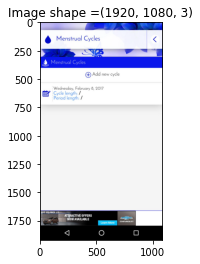

In [14]:
matplotlib.pyplot.imshow(imageArray, cmap='gray')
matplotlib.pyplot.title('Image shape =' + str(imageArray.shape))

In [24]:
limit = 1000

imageResizeFactor = math.gcd(2560, 1440)/4 # HCF/GCD is 160 for annotated images
newImageDim1 = int(2560/imageResizeFactor)
newImageDim2 = int(1440/imageResizeFactor)
RGB = 3

imageData = []

for key,value in datamap.items():
    if key > limit:
        break
    # semantic images are in png not jpg
    imageArray = cv2.imread(os.path.join(r"C:\Users\Ana\Desktop\projekt\rico_dataset_v0.1_semantic_annotations\unique_uis\combined", str(int(key))+'.jpg'))
    # resize if need to resize
    imageArray = cv2.resize(imageArray,(newImageDim2,newImageDim1)) # for some reason, will ask Farzaneh
    imageArray = imageArray.astype('float32')
    imageData.append(imageArray/255)

Text(0.5, 1.0, 'Image shape =(64, 36, 3)')

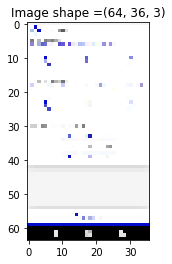

In [25]:
inputValues = np.array(imageData)

matplotlib.pyplot.imshow(inputValues[0], cmap='gray')
matplotlib.pyplot.title('Image shape =' + str(inputValues[0].shape))

In [26]:
inputValues.shape

(935, 64, 36, 3)

In [27]:
outputValues.shape

(935, 3)

In [28]:
trainingDataX, testingDataX, trainingDataY, testingDataY = sklearn.model_selection.train_test_split(inputValues, outputval, test_size=0.3)
print(trainingDataX.shape)
print(trainingDataY.shape)
print(testingDataX.shape)
print(testingDataY.shape)

(654, 64, 36, 3)
(654, 3)
(281, 64, 36, 3)
(281, 3)


### model

In [29]:

def buildCNNModel():
    inputLayer = keras.layers.Input(shape = (newImageDim1, newImageDim2, RGB))
    
    # first convolutional unit
    convolutionalLayer10 = keras.layers.Conv2D(64, 
                                              kernel_size=(3,3),
                                              activation='relu',
                                              input_shape=(newImageDim1, newImageDim2, RGB))(inputLayer)
    maxpoolingLayer10 = keras.layers.MaxPooling2D(pool_size=(2, 2))(convolutionalLayer10)
    
    # second convolutional unit
    convolutionalLayer20 = keras.layers.Conv2D(64,
                                              kernel_size=(3,3),
                                              activation='relu',
                                              input_shape=(newImageDim1, newImageDim2, RGB))(maxpoolingLayer10)
    maxpoolingLayer20 = keras.layers.MaxPooling2D(pool_size=(2, 2))(convolutionalLayer20)

    # third convolutional unit
    convolutionalLayer30 = keras.layers.Conv2D(64,
                                              kernel_size=(3,3),
                                              activation='relu',
                                              input_shape=(newImageDim1, newImageDim2, RGB))(maxpoolingLayer20)
    maxpoolingLayer30 = keras.layers.MaxPooling2D(pool_size=(2, 2))(convolutionalLayer30)
    
    # fork into three channels here    
    
    # fork into three channels here, this is first output(for regularity)
    flattenLayer11 = keras.layers.Flatten()(maxpoolingLayer30)
    denseLayer11 = keras.layers.Dense(216, activation='relu')(flattenLayer11)
    denseLayer21 = keras.layers.Dense(36, activation='relu')(denseLayer11)
    denseLayer31 = keras.layers.Dense(6, activation='relu')(denseLayer21)
    outputLayer1 = keras.layers.Dense(1, activation='sigmoid')(denseLayer31)
    
    # this is second output (for complexity)
    flattenLayer12 = keras.layers.Flatten()(maxpoolingLayer30)
    denseLayer12 = keras.layers.Dense(216, activation='relu')(flattenLayer12)
    denseLayer22 = keras.layers.Dense(36, activation='relu')(denseLayer12)
    denseLayer32 = keras.layers.Dense(6, activation='relu')(denseLayer22)
    outputLayer2 = keras.layers.Dense(1, activation='sigmoid')(denseLayer32)
    
    # this is third output (for touch)
    # fourth convolutional unit
    convolutionalLayer43 = keras.layers.Conv2D(64,
                                              kernel_size=(3,3),
                                              activation='relu',
                                              input_shape=(newImageDim1, newImageDim2, RGB))(maxpoolingLayer20)
    maxpoolingLayer43 = keras.layers.MaxPooling2D(pool_size=(2, 2))(convolutionalLayer43)
    
    flattenLayer13 = keras.layers.Flatten()(maxpoolingLayer43)
    denseLayer13 = keras.layers.Dense(216, activation='relu')(flattenLayer13)
    denseLayer23 = keras.layers.Dense(36, activation='relu')(denseLayer13)
    denseLayer33 = keras.layers.Dense(6, activation='relu')(denseLayer23)
    outputLayer3 = keras.layers.Dense(1, activation='tanh')(denseLayer33)
    
    # generate model from stucture
    model = keras.models.Model(inputLayer, [outputLayer1, outputLayer2, outputLayer3])
    
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mean_squared_error'])
    
    return model

trainingModel = buildCNNModel()
trainingModel.summary()

fitModel = trainingModel.fit(trainingDataX, 
                             [trainingDataY[:,0],
                             trainingDataY[:,1],
                             trainingDataY[:,2]],
                             epochs=30,
                            )

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 36, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 62, 34, 64)   1792        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 31, 17, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 29, 15, 64)   36928       ['max_pooling2d[0][0]']          
                                                                                              

testing

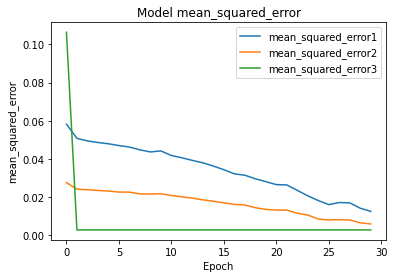

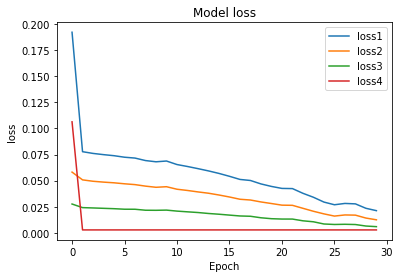

In [30]:

def makeModelPlot(plotType, fitModel):
    modelHistoryKeys = fitModel.history.keys()
    counter = 1
    matplotlib.pyplot.figure()
    for key in modelHistoryKeys:
        if key.endswith(plotType):
            matplotlib.pyplot.plot(fitModel.history[key],
            label=plotType+str(counter))
            counter = counter + 1
        else: continue
    matplotlib.pyplot.title('Model ' + plotType)
    matplotlib.pyplot.ylabel(plotType)
    matplotlib.pyplot.xlabel('Epoch')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.show()

# check model accuracy 
# plot the accuracy per epoch
makeModelPlot('mean_squared_error',fitModel)
# plot loss per epoch
makeModelPlot('loss',fitModel)

In [31]:
# save model to JSON
model_json = trainingModel.to_json()
with open("model_888989.json", "w") as json_file:
    json_file.write(model_json)

# save weights to HDF5
# weights = model.get_weights()
# np.save("weights_array.npy", weights)
trainingModel.save_weights("model_888989.h5")
print("Saved model")

Saved model


In [32]:

# load json and create model
json_file = open('model_888989.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
weights = loaded_model.load_weights("model_888989.h5")
print("Loaded model")

Loaded model


(64, 36, 3)
1/1 [==============================] - 0s 22ms/step
Image index 133
This screenshot is predicted to have RM=  0.102023736 and it actually has RM =  0.0606060606060605
This screenshot is predicted to have CM=  0.7381827 and it actually has CM =  0.7272727272727273
This screenshot is predicted to have TTM=  1.0 and it actually has TTM =  1.0


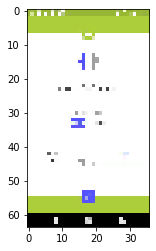

In [33]:

# Predicted vs. actual measure verification
image_index = np.random.randint(0, len(imageData))
print(inputValues[image_index].shape)

matplotlib.pyplot.imshow(inputValues[image_index])

predRM = loaded_model.predict(inputValues[image_index].reshape(1,newImageDim1,newImageDim2,3))[0]
predCM = loaded_model.predict(inputValues[image_index].reshape(1,newImageDim1,newImageDim2,3))[1]
predTTM = loaded_model.predict(inputValues[image_index].reshape(1,newImageDim1,newImageDim2,3))[2]

print("Image index " + str(image_index))
print("This screenshot is predicted to have RM=  " + str(predRM[0][0]) + " and it actually has RM =  " + str(outputValues[:,0][image_index]))
print("This screenshot is predicted to have CM=  " + str(predCM[0][0]) + " and it actually has CM =  " + str(outputValues[:,1][image_index]))
print("This screenshot is predicted to have TTM=  " + str(predTTM[0][0]) + " and it actually has TTM =  " + str(outputValues[:,2][image_index]))


---------------------------
### testing for web ui

In [37]:
imageResizeFactor = math.gcd(2560, 1440)/4 # HCF/GCD is 160 for annotated images
newImageDim1 = int(2560/imageResizeFactor)
newImageDim2 = int(1440/imageResizeFactor)
RGB = 3

imageArray = cv2.imread(os.path.join(r"C:\Users\Ana\Desktop\projekt\web-ui\google.png"))


imageArray = cv2.resize(imageArray,(newImageDim2,newImageDim1)) # for some reason, will ask Farzaneh
imageArray = imageArray.astype('float32')
imageArray = imageArray/255

expected low complexity value

1/1 [==============================] - 0s 24ms/step
This screenshot is predicted to have RM=  0.10702274
This screenshot is predicted to have CM=  0.7061371
This screenshot is predicted to have TTM=  1.0


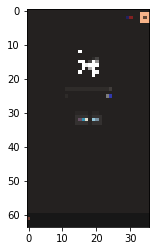

In [38]:
matplotlib.pyplot.imshow(imageArray)

predRM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[0]
predCM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[1]
predTTM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[2]

print("This screenshot is predicted to have RM=  " + str(predRM[0][0]))
print("This screenshot is predicted to have CM=  " + str(predCM[0][0]))
print("This screenshot is predicted to have TTM=  " + str(predTTM[0][0]))

In [39]:
imageResizeFactor = math.gcd(2560, 1440)/4 # HCF/GCD is 160 for annotated images
newImageDim1 = int(2560/imageResizeFactor)
newImageDim2 = int(1440/imageResizeFactor)
RGB = 3

imageArray = cv2.imread(os.path.join(r"C:\Users\Ana\Desktop\projekt\web-ui\tuwel.png"))


imageArray = cv2.resize(imageArray,(newImageDim2,newImageDim1)) # for some reason, will ask Farzaneh
imageArray = imageArray.astype('float32')
imageArray = imageArray/255

expected high complexity value

1/1 [==============================] - 0s 24ms/step
This screenshot is predicted to have RM=  0.15186827
This screenshot is predicted to have CM=  0.68213683
This screenshot is predicted to have TTM=  1.0


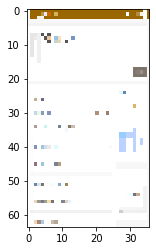

In [42]:
matplotlib.pyplot.imshow(imageArray)

predRM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[0]
predCM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[1]
predTTM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[2]

print("This screenshot is predicted to have RM=  " + str(predRM[0][0]))
print("This screenshot is predicted to have CM=  " + str(predCM[0][0]))
print("This screenshot is predicted to have TTM=  " + str(predTTM[0][0]))

In [43]:
imageResizeFactor = math.gcd(2560, 1440)/4 # HCF/GCD is 160 for annotated images
newImageDim1 = int(2560/imageResizeFactor)
newImageDim2 = int(1440/imageResizeFactor)
RGB = 3

imageArray = cv2.imread(os.path.join(r"C:\Users\Ana\Desktop\projekt\web-ui\youtube.png"))


imageArray = cv2.resize(imageArray,(newImageDim2,newImageDim1)) # for some reason, will ask Farzaneh
imageArray = imageArray.astype('float32')
imageArray = imageArray/255

expected high regularity value

1/1 [==============================] - 0s 24ms/step
This screenshot is predicted to have RM=  0.0055519985
This screenshot is predicted to have CM=  0.87986505
This screenshot is predicted to have TTM=  1.0


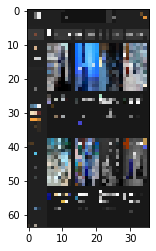

In [44]:
matplotlib.pyplot.imshow(imageArray)

predRM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[0]
predCM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[1]
predTTM = loaded_model.predict(imageArray.reshape(1,newImageDim1,newImageDim2,3))[2]

print("This screenshot is predicted to have RM=  " + str(predRM[0][0]))
print("This screenshot is predicted to have CM=  " + str(predCM[0][0]))
print("This screenshot is predicted to have TTM=  " + str(predTTM[0][0]))